In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis (EDA) & Data Quality Analysis
Before diving into cohort analysis, conduct an exploratory data analysis to gain a comprehensive understanding of the dataset. Explore key statistics, distributions, and visualizations to identify patterns and outliers. EDA will help you make informed decisions on data preprocessing and analysis strategies.

Assess the quality of the dataset by identifying missing values, data inconsistencies, and potential errors. Implement data cleaning and preprocessing steps to ensure the reliability of your analysis. Document any data quality issues encountered and the steps taken to address them.

In [2]:
# We import the 2 csv that contains the information
# The xlsx file provided is the lexique and provides information about the content of the csv files
cash_request_df = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees_df = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')


## 1.1. Explore 'cach_request_df'

In [3]:
display(cash_request_df)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


### Features (provided in Lexique):
- **id**: Unique ID of Cash Request
- **amount**: Amount of the Cash Request
- **status**: Status of the CR. Possibles values are: 
    - **approved**: CR is a 'regular' one (= without fees) and was approved either automatically or manually. Funds will be sent aprox. 7 days after the creation 
    - **money_sent**: We transferred the fund to the customer account. Will change to active once we detect that the user received the funds (using user's bank history) 
    - **rejected**: The CR needed a manual review and was rejected 
    - **pending**: The CR is pending a manual review from an analyst 
    - **transaction_declined**: We failed to send the funds to the customer 
    - **waiting_user_confirmation**: The user needs to confirm in-app that he want the CR (for legal reasons) 
    - **direct_debit_rejected**: Our last attempt of SEPA direct debit to charge the customer was rejected  
    - **canceled**: The user didn't confirm the cash request in-app, we automatically canceled it -
    - **direct_debit_sent**: We sent/scheduled a SEPA direct debit to charge the customer account. The result of this debit is not yet confirmed 
    - **waiting_reimbursement**: We were not able to estimate a date of reimbursement, the user needs to choose one in the app. 
    - **active**: - Funds were received on the customer account. 
    - **money_back**: The CR was successfully reimbursed.
- **reason**:	Filled only if the CR was manually reviewed and rejected. That's the rejection's reason displayed in-app.
- **created_at**:	Timestamp of the CR creation
- **updated_at**:	Timestamp of the latest CR's details update (= update of at least one column in this table)
- **user_id** (Unique): ID of the user who requested the cash advance
- **moderated_at**:	Timestamp of the manual review. Only filled if the CR needed a manual review
- **deleted_account_id**:	If a user delete his account, we are replacing the user_id by this id. It corresponds to a unique ID in the deleted account table with some keys information saved for fraud-fighting purposes (while respecting GDPR regulation)
- **reimbursement_date**:	Planned reimbursement date. The user card will be charged at this date.
- **cash_request_debited_date**:	Filled only if a SEPA direct debit was sent. It's the date were the latest direct debit was seen on the user account.
- **cash_request_received_date**:	Date of the receipt of the CR. Based on user's bank history.
- **money_back_date**:	Date where the CR was considered as money back. It's either the paid_by_card date or the date were we considered that's the direc debit have low odds to be rejected (based on business rules) 
- **transfer_type**: 
    - **Instant** = user choose not received the advance instantly . 
    - **Regular** = user choose to not pay and wait for the transfer
- **send_at**:	Timestamp of the funds's transfer
- **recovery_status**:	Null if the cash request never had a payment incident. 
- **completed** : the payment incident was resolved (=the cash request was reimbursed) 
- **pending** : the payment incident still open 
- **pending_direct_debit** : the payment incident still open but a SEPA direct debit is launched
- **reco_creation**:	Timestamp of the recovery creation
- **reco_last_update**:	Timestamp of the last recovery case update. Can be used to determine the incident closure date.

### Get data information

In [4]:
# Total number of rows and columns
data_shape = cash_request_df.shape
print(f"Our data has a total of {data_shape[0]} and {data_shape[1]} characteristics")

# Numeric vs Categorical Features
num = cash_request_df.select_dtypes(include="number")
cat = cash_request_df.select_dtypes(exclude="number")
print(f"\nOut data has {num.shape[1]} numerical features:\n", list(num.columns))
print(f"\nOut data has {cat.shape[1]} categorical features:\n", list(cat.columns))

# Check for missing data
print("\nHow many NULL values do we have in each feature?:")
print(cash_request_df.isna().sum())

print("\nHow many empty strings (" ") do we have in each feature?:")
print(cash_request_df.eq(" ").sum())

# Check for duplicates
print("\nHow many duplicates rows do we have in our data?:")
print(cash_request_df.duplicated().sum())

Our data has a total of 23970 and 16 characteristics

Out data has 4 numerical features:
 ['id', 'amount', 'user_id', 'deleted_account_id']

Out data has 12 categorical features:
 ['status', 'created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 'cash_request_received_date', 'money_back_date', 'transfer_type', 'send_at', 'recovery_status', 'reco_creation', 'reco_last_update']

How many NULL values do we have in each feature?:
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update   

In [5]:
# Categorical Values
print("How many unique values these columns have?")
for col in cat.columns:
    print(f"{col}: ", len(cat[col].unique()))

print("\nCheck values of the real categorical features?")
print(f"status: ", cat["status"].unique())
print(f"transfer_type: ", cat["transfer_type"].unique())
print(f"recovery_status: ", cat["recovery_status"].unique())
# There are no miss-spelled 

print("\nCheck frequency of categorical values")
display(pd.concat([cat["status"].value_counts(), cat["status"].value_counts(normalize=True).round(2)], axis=1))
display(pd.concat([cat["transfer_type"].value_counts(), cat["transfer_type"].value_counts(normalize=True).round(2)], axis=1))
display(pd.concat([cat["recovery_status"].value_counts(), cat["recovery_status"].value_counts(normalize=True).round(2)], axis=1))


How many unique values these columns have?
status:  7
created_at:  23970
updated_at:  23970
moderated_at:  16036
reimbursement_date:  4089
cash_request_received_date:  313
money_back_date:  12222
transfer_type:  2
send_at:  16642
recovery_status:  5
reco_creation:  3331
reco_last_update:  3331

Check values of the real categorical features?
status:  ['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']
transfer_type:  ['regular' 'instant']
recovery_status:  [nan 'completed' 'pending' 'pending_direct_debit' 'cancelled']

Check frequency of categorical values


,count,proportion
status,,
money_back,16397,0.68
rejected,6568,0.27
direct_debit_rejected,831,0.03
active,59,0.00
transaction_declined,48,0.00
direct_debit_sent,34,0.00
canceled,33,0.00


,count,proportion
transfer_type,,
instant,13882,0.58
regular,10088,0.42


,count,proportion
recovery_status,,
completed,2468,0.74
pending,845,0.25
pending_direct_debit,16,0.00
cancelled,1,0.00


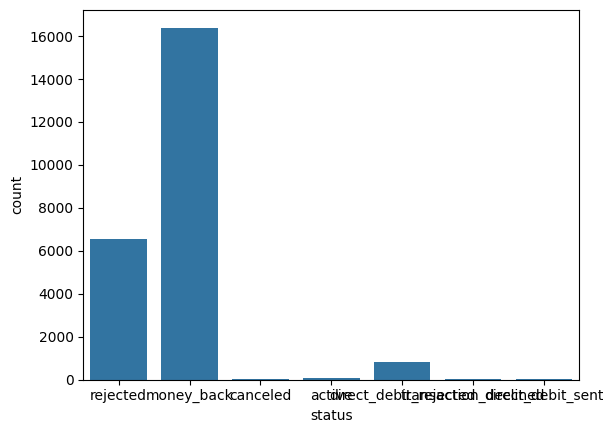

In [6]:
sns.countplot(
	x="status",
	data=cat,
	legend=False,
);

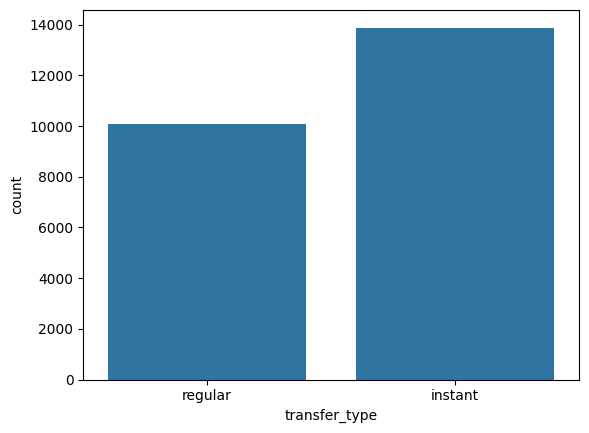

In [7]:
sns.countplot(
	x="transfer_type",
	data=cat,
	legend=False,
);

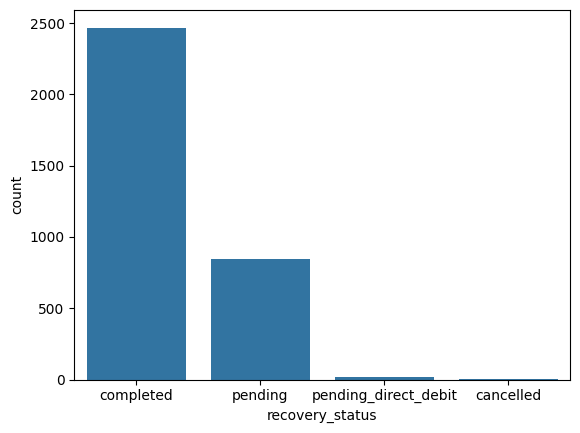

In [8]:
sns.countplot(
	x="recovery_status",
	data=cat,
	legend=False,
);

In [9]:
# Numerical Values
display(num.describe())

# Let's check the Skewness of amount (it's not intersting for ids)
print("What is the Skewness for amount?")
print(f"amount skewness: { num.amount.skew() }")

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


What is the Skewness for amount?
amount skewness: -0.9196537790718163


[None]

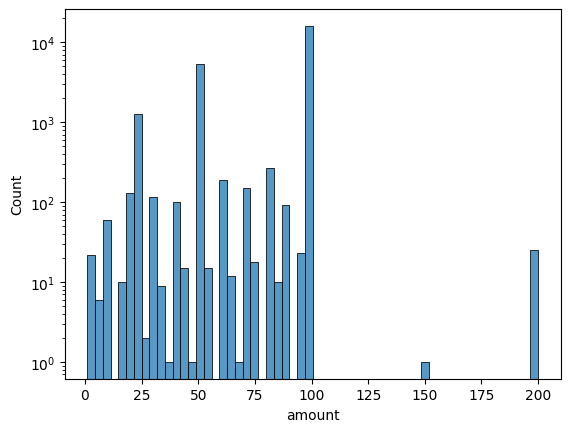

In [10]:
# We draw the histogram with y logaithmic because it was not visible with normal scale
hist = sns.histplot(num.amount, bins="auto")
hist.set(yscale='log')

In [11]:
# Validate all users with user_id == Null are deleted
print("Do all user with user_id == NaN have an deleted_account_id set?", 
      len(num[num["user_id"].isna()]) == len(num[(num["user_id"].isna()) & (num["deleted_account_id"].isna() == False)]))

Do all user with user_id == NaN have an deleted_account_id set? True


In [12]:
# Can we remove the registers with category = 'rejected' given we will only keep the ones with sent_at set?
tmp = cat["send_at"].isna()
tmp.name = "send_at_isna"
tmp = pd.crosstab(cat["status"], tmp)
display(tmp)
print(tmp.sum())

send_at_isna,False,True
status,,
active,44,15
canceled,18,15
direct_debit_rejected,626,205
direct_debit_sent,31,3
money_back,12012,4385
rejected,3862,2706
transaction_declined,48,0


send_at_isna
False    16641
True      7329
dtype: int64


### Requests Analysis:
After reviewing the fields and with the objective in mind ("analyze user cohorts defined by the month of creation of their first cash advance") we can use certain  values of the column "status" ("money_sent", "active", "money_back", ...) to identify requests that received money, but after a deeper look we decided to filter the paid request by the ones that have the value 'send_at' defined, since it represent the date when the money was sent.

After reviewing the non numerical values we have confirmed that the categorical values are:
- status
- transfer_type
- recovery_status

The analysis of the numerical values did not provide much relevant information:
- In general the distribution of the amount is in between 0 and 100 but there are some cases that it can be 200
- We confirmed all user_id with value NULL have a deleted_account_id, so these where deleted due GDPR

We also decided to leave outside the selected request (assumptions\*):
- Request in status "canceled". This only represents 33 requests in all the dataset (close to 0%)
- Request in status "transaction_declined" since the payment was not done but they will have money_sent date. It also represents less than the 0% of the transactions (48 in total)
- Users with a value set in 'deleted_account_id' since it's not clear if we can use their data (due GDPR) plus makes easier to group the data.

Other assumtions we rejected:
- Request in status "rejected". We are unsure if to remove the requests in this status. 
    - We have checked the amount of rejected request that where paid and these represents the 23% of all paid requests (3862 / 16641) so we will not delete them.

\* We would need to validate if these are relevant or not with a business person.

In [13]:
# Get the CashRequest that where paid
cashrequest_paid_df = cash_request_df[(cash_request_df["send_at"].isna()==False) &
                                       (cash_request_df["status"].isin(["transaction_declined", "cancelled"])==False) &
                                       (cash_request_df["deleted_account_id"].isna())].copy()
display(cashrequest_paid_df)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525+00,NaN,NaN,NaN
55,9323,50.0,rejected,2020-07-21 21:33:12.430494+00,2020-07-22 08:59:33.989211+00,23318.0,2020-07-22 08:59:33.986846+00,NaN,2020-08-05 22:00:00+00,NaN,NaN,regular,2020-07-28 21:33:12.430087+00,NaN,NaN,NaN
60,18701,100.0,rejected,2020-10-01 11:41:07.208207+00,2020-10-01 12:26:23.482538+00,57285.0,2020-10-01 12:26:23.47496+00,NaN,2020-11-04 22:00:00+00,NaN,NaN,regular,2020-10-08 11:41:07.170136+00,NaN,NaN,NaN
62,16121,50.0,rejected,2020-09-14 23:05:32.606904+00,2020-09-15 08:16:28.688342+00,38075.0,2020-09-15 08:16:28.681129+00,NaN,2020-10-05 22:00:00+00,NaN,NaN,instant,2020-09-21 23:05:32.558375+00,NaN,NaN,NaN
135,18459,100.0,rejected,2020-09-29 18:36:25.875659+00,2020-09-30 07:51:52.005581+00,55584.0,2020-09-30 07:51:51.997203+00,NaN,2020-10-07 22:00:00+00,NaN,NaN,instant,2020-10-06 18:36:25.849957+00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00,2021-02-05 12:11:58.186458+00,20064.0,2020-09-19 15:37:54.670099+00,NaN,2020-10-05 22:00:00+00,2020-09-22,2021-02-05 12:11:58.131036+00,instant,2020-09-26 07:37:14.299162+00,completed,2020-10-15 22:27:12.949488+00,2021-02-05 12:11:58.134306+00
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


## 1.2. Explore 'fees_df'

In [14]:
display(fees_df)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


### Features (provided in Lexique):
- **id**:	Unique ID of the fee object
- **type**:	Type of fee Possible values are :  
    - **instant_payment** : fees for instant cash request (send directly after user's request, through SEPA Instant Payment)  
    - **split_payment** : futures fees for split payment (in case of an incident, we'll soon offer the possibility to our users to reimburse in multiples installements) 
    - **incident** : fees for failed reimbursement. Created after a failed direct debit 
    - **postpone** : fees created when a user want to postpone the reimbursment of a CR
- **status**:	Status of the fees (= does the fees was successfully charged)  Possibles values are :  
    - **confirmed** : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer. 
    - **rejected** : the last attempt to charge the fee failed. 
    - **cancelled** : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same. - accepted : fees were successfully charged
- **category**:	Describe the reason of the incident fee.  2 possibles values :   
    - **rejected_direct_debit** : fees created when user's bank rejects the first direct debit 
    - **month_delay_on_payment** : fees created every month until the incident is closed
- **reason**:	Description of the fee
- **created_at**:	Timestamp of the fee's creation
- **updated_at**:	Timestamp of the latest fee's details update
- **paid_at**:	Timestamp of the fee's payment
- **from_date**:	Apply only to postpone fees. Initial date of reimbursement for the CR
- **to_date**:	Apply only to postpone fees. New date of reimbursement for the CR
- **cash_request_id**:	Unique ID of the CR linked to this fee
- **total_amount**:	Amount of the fee (including VAT)
- **charge_moment**:	When the fee will be charge.  2 possibles values :  
    - **before** : the fee should be charged at the moment of its creation 
    - **after** : the fee should be charged at the moment of the CR's reimbursement


### Get data information

In [15]:
# Total number of rows and columns
data_shape = fees_df.shape
print(f"Our data has a total of {data_shape[0]} and {data_shape[1]} characteristics")

# Numeric vs Categorical Features
num = fees_df.select_dtypes(include="number")
cat = fees_df.select_dtypes(exclude="number")
print(f"\nOut data has {num.shape[1]} numerical features:\n", list(num.columns))
print(f"\nOut data has {cat.shape[1]} categorical features:\n", list(cat.columns))

# Check for missing data
print("\nHow many NULL values do we have in each feature?:")
print(fees_df.isna().sum())

print("\nHow many empty strings (" ") do we have in each feature?:")
print(fees_df.eq(" ").sum())

# Check for duplicates
print("\nHow many duplicates rows do we have in our data?:")
print(fees_df.duplicated().sum())

Our data has a total of 21061 and 13 characteristics

Out data has 3 numerical features:
 ['id', 'cash_request_id', 'total_amount']

Out data has 10 categorical features:
 ['type', 'status', 'category', 'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date', 'charge_moment']

How many NULL values do we have in each feature?:
id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

How many empty strings () do we have in each feature?:
id                 0
cash_request_id    0
type               0
status             0
category           0
total_amount       0
reason             0
created_at         0
updated_at         0
paid_at            0
from_date          0
to_date            0
charge_mom

In [16]:
# Categorical Values
print("How many unique values these columns have?")
for col in cat.columns:
    print(f"{col}: ", len(cat[col].unique()))

print("\nCheck values of the real categorical features?")
print(f"type: ", cat["type"].unique())
print(f"status: ", cat["status"].unique())
print(f"category: ", cat["category"].unique())
print(f"charge_moment: ", cat["charge_moment"].unique())
# There are no miss-spelled status 

print("\nCheck the frequency of the real categorical values")
display(pd.concat([cat["type"].value_counts(), cat["type"].value_counts(normalize=True).round(2)], axis=1))
display(pd.concat([cat["status"].value_counts(), cat["status"].value_counts(normalize=True).round(2)], axis=1))
display(pd.concat([cat["category"].value_counts(), cat["category"].value_counts(normalize=True).round(2)], axis=1))
tmp = cat["category"].copy()
tmp[tmp.isna()] = "empty" 
display(pd.concat([tmp.value_counts(), tmp.value_counts(normalize=True).round(2)], axis=1))
display(pd.concat([cat["charge_moment"].value_counts(), cat["charge_moment"].value_counts(normalize=True).round(2)], axis=1))

How many unique values these columns have?
type:  3
status:  4
category:  3
reason:  15149
created_at:  21026
updated_at:  21061
paid_at:  15530
from_date:  1085
to_date:  1561
charge_moment:  2

Check values of the real categorical features?
type:  ['instant_payment' 'incident' 'postpone']
status:  ['rejected' 'accepted' 'cancelled' 'confirmed']
category:  [nan 'rejected_direct_debit' 'month_delay_on_payment']
charge_moment:  ['after' 'before']

Check the frequency of the real categorical values


,count,proportion
type,,
instant_payment,11099,0.53
postpone,7766,0.37
incident,2196,0.10


,count,proportion
status,,
accepted,14841,0.70
cancelled,4938,0.23
rejected,1194,0.06
confirmed,88,0.00


,count,proportion
category,,
rejected_direct_debit,1599,0.73
month_delay_on_payment,597,0.27


,count,proportion
category,,
empty,18865,0.90
rejected_direct_debit,1599,0.08
month_delay_on_payment,597,0.03


,count,proportion
charge_moment,,
after,16724,0.79
before,4337,0.21


In [17]:
# Numerical Values
display(num.describe())

# Let's check the Skewness of amount (it's not intersting for ids)
print("What is the Skewness for amount?")
print(f"total_amount skewness: { num.total_amount.skew() }")

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


What is the Skewness for amount?
total_amount skewness: 145.12408483776915


[None]

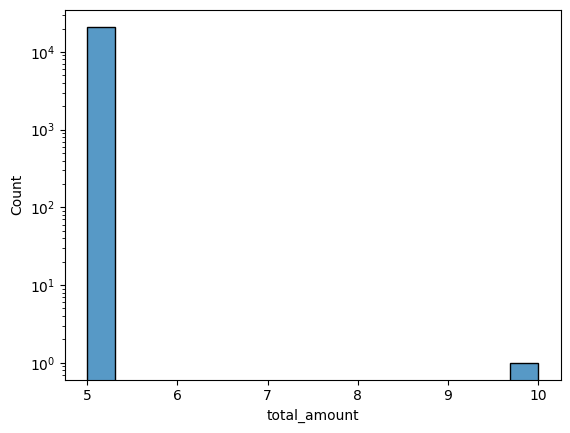

In [18]:
# We draw the histogram with y logaithmic because it was not visible with normal scale
hist = sns.histplot(num.total_amount, bins="auto")
hist.set(yscale='log')

### Fees Analysis:

Analysing the empty values we have discover:
- 'categories' has 18865/21061 empty, based on the lexicary description we can understand that only fees with incidents have this value set.
- 'paid_at' has 5530 empty fields. Assumption: these are payments still pending to be paid
- 'from_date' and 'to_date' have 13295 empty fields. Based on the lexicarium these are only applied to postponed fees.

On the numeric side we have found that almost all the amounts are equal to 5 except for 1 that was 10.

Assumptions:
- Since type = "incident" represents a payment fee due a reimbousment and not an incident with a payments we are going to use "Category" == NaN to determine if a payments had an incident or not.
- We can use 'paid_at' to determine the date of payment for each feed except for the payments with type = posponed. On these cases we will take the date in 'to_date' as payment date

Validate:
- \#TODO: All the payments without paid_at has been postponed (have from_date)

# 2. Prepare data

In [19]:
# Transform dates in datetime
cashrequest_paid_df["send_at"] = cashrequest_paid_df.apply(lambda x: pd.to_datetime(x["send_at"]), axis=1)
cashrequest_paid_df["created_at"] = cashrequest_paid_df.apply(lambda x: pd.to_datetime(x["created_at"]), axis=1)

In [20]:
# We get the smaller sent_at for each user_id
tmp_df = cashrequest_paid_df[["send_at", "user_id"]].groupby("user_id").min()
tmp_df["cohort"] = tmp_df["send_at"].apply(lambda x: str(x.tz_convert(None).to_period("M")))

# We add the cohort information to all the registers based on the user id
cashrequest_paid_df = cashrequest_paid_df.merge(tmp_df.reset_index()[["user_id", "cohort"]], how="left", on = ["user_id"])
display(cashrequest_paid_df)

# TODO: Test groupby().transform()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,NaN,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525+00:00,NaN,NaN,NaN,2020-09
1,9323,50.0,rejected,2020-07-21 21:33:12.430494+00:00,2020-07-22 08:59:33.989211+00,23318.0,2020-07-22 08:59:33.986846+00,NaN,2020-08-05 22:00:00+00,NaN,NaN,regular,2020-07-28 21:33:12.430087+00:00,NaN,NaN,NaN,2020-07
2,18701,100.0,rejected,2020-10-01 11:41:07.208207+00:00,2020-10-01 12:26:23.482538+00,57285.0,2020-10-01 12:26:23.47496+00,NaN,2020-11-04 22:00:00+00,NaN,NaN,regular,2020-10-08 11:41:07.170136+00:00,NaN,NaN,NaN,2020-10
3,16121,50.0,rejected,2020-09-14 23:05:32.606904+00:00,2020-09-15 08:16:28.688342+00,38075.0,2020-09-15 08:16:28.681129+00,NaN,2020-10-05 22:00:00+00,NaN,NaN,instant,2020-09-21 23:05:32.558375+00:00,NaN,NaN,NaN,2020-09
4,18459,100.0,rejected,2020-09-29 18:36:25.875659+00:00,2020-09-30 07:51:52.005581+00,55584.0,2020-09-30 07:51:51.997203+00,NaN,2020-10-07 22:00:00+00,NaN,NaN,instant,2020-10-06 18:36:25.849957+00:00,NaN,NaN,NaN,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15489,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00,20064.0,2020-09-19 15:37:54.670099+00,NaN,2020-10-05 22:00:00+00,2020-09-22,2021-02-05 12:11:58.131036+00,instant,2020-09-26 07:37:14.299162+00:00,completed,2020-10-15 22:27:12.949488+00,2021-02-05 12:11:58.134306+00,2020-08
15490,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaN,NaN,2020-10
15491,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00:00,NaN,NaN,NaN,2020-10
15492,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00:00,NaN,NaN,NaN,2020-10


These are the cohorts identified based on the data and the assumptions taken:
 ['2020-09' '2020-07' '2020-10' '2020-08' '2020-11']


,count,proportion
cohort,,
2020-10,6356,0.41
2020-08,5825,0.38
2020-09,2042,0.13
2020-07,1102,0.07
2020-11,169,0.01


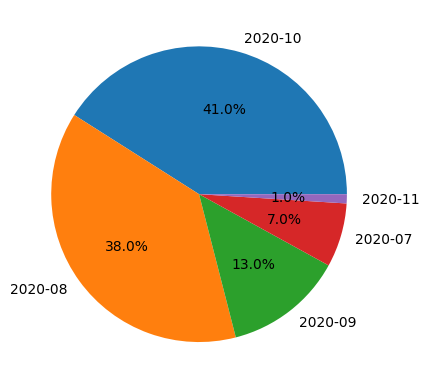

In [21]:
# Number of Cohorts identified
print("These are the cohorts identified based on the data and the assumptions taken:\n", cashrequest_paid_df["cohort"].unique())

cohort_freq_df = pd.concat([cashrequest_paid_df["cohort"].value_counts(), cashrequest_paid_df["cohort"].value_counts(normalize=True).round(2)], axis=1)
display(cohort_freq_df)
plt.pie(cohort_freq_df["proportion"], labels=cohort_freq_df.index, autopct='%1.1f%%');

In [22]:
# Finally, we are going to keep, in a new dataframe (fees_filtered_df), only the payments for the requests filtered in the previous step (cashrequest_paid_df). 
# And we are going to add the cohort calculated to these 
fees_filtered_df = fees_df.merge(cashrequest_paid_df[["id", "cohort"]], how = "inner", left_on = "cash_request_id", right_on="id")

### 
fees_filtered_df["payment_date"] = fees_filtered_df.apply(lambda x: x["to_date"] if pd.isna(x["to_date"])==False else x["paid_at"] , axis=1)
fees_filtered_df["payment_date"] = fees_filtered_df.apply(lambda x: pd.to_datetime(x["payment_date"]), axis=1)

fees_filtered_df["paid_at"] = fees_filtered_df.apply(lambda x: pd.to_datetime(x["paid_at"]), axis=1)

fees_filtered_df

,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cohort,payment_date
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.470110+00:00,NaN,NaN,after,14941,2020-09,2020-12-17 14:50:07.470110+00:00
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.459080+00:00,NaN,NaN,after,11714,2020-08,2020-12-08 17:13:10.459080+00:00
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.432910+00:00,NaN,NaN,after,23371,2020-10,2020-11-04 19:34:37.432910+00:00
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00:00,NaN,NaN,after,26772,2020-10,2020-11-19 05:09:22.500223+00:00
4,17029,24052.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 24052,2020-10-24 12:22:27.666102+00,2020-10-24 12:22:27.666124+00,2020-11-09 19:10:14.474070+00:00,NaN,NaN,after,24052,2020-10,2020-11-09 19:10:14.474070+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00:00,NaN,NaN,after,20262,2020-10,2020-11-17 05:14:00.080854+00:00
16997,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00:00,NaN,NaN,after,26764,2020-10,2020-12-16 07:10:54.697639+00:00
16998,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00:00,NaN,NaN,after,25331,2020-10,2020-11-18 04:35:42.915511+00:00
16999,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00:00,NaN,NaN,after,23628,2020-10,2020-12-18 05:18:01.465317+00:00


# 3. Metrics to Analyze
1. Frequency of Service Usage: Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.
2. Incident Rate: Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.
3. Revenue Generated by the Cohort: Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
4. New Relevant Metric: Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

## 3.1 Frequency of Service Usage

In [23]:
ex1_df = cashrequest_paid_df.copy()
#cashrequest_filter_df["with_indicent"] = cashrequest_filter_df.apply(lambda x: 0 if x["recovery_status"].isna() else 1 , axis=1) 
#cashrequest_filter_df[cashrequest_filter_df["recovery_status"].isna()]
ex1_df["period"] = ex1_df["send_at"].apply(lambda x: str(x.tz_convert(None).to_period("M")))
#tmp_df[["cohort", "period", "id"]].groupby(["cohort", "period"]).agg(frequency_of_service = ("id", "count"))
print("Frequency of Service Usage (per cohort over time):")
ex1_df = ex1_df.pivot_table(values = "id", index = "cohort" ,columns = "period", aggfunc = "count").fillna(0)
display(ex1_df)

Frequency of Service Usage (per cohort over time):


period,2020-07,2020-08,2020-09,2020-10,2020-11
cohort,,,,,
2020-07,419.0,298.0,189.0,194.0,2.0
2020-08,0.0,3060.0,1286.0,1437.0,42.0
2020-09,0.0,0.0,1374.0,641.0,27.0
2020-10,0.0,0.0,0.0,6309.0,47.0
2020-11,0.0,0.0,0.0,0.0,169.0


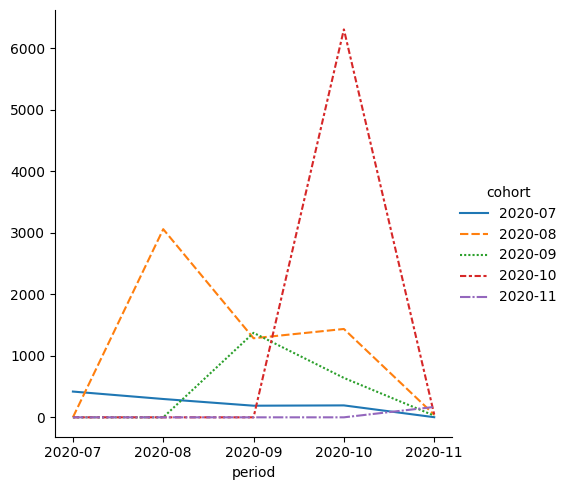

In [24]:
sns.relplot(data=ex1_df.T, kind="line");

## 3.2 Incident Rate

In [25]:
ex2_df = fees_filtered_df.copy()

# Calculate Payment Incident Rate
ex2_df["incident"] = (ex2_df["category"].isna() == False)

# Calculate the number of incidents and the amount of payments
ex2_df = ex2_df.groupby("cohort").agg(total=("id_x", "count"), incidents=("incident", "sum"))

# Calculate incident rate
ex2_df["incident_rate"] = ex2_df["incidents"] / ex2_df["total"]
ex2_df

,total,incidents,incident_rate
cohort,,,
2020-07,884,124,0.140271
2020-08,5969,627,0.105043
2020-09,2332,142,0.060892
2020-10,7748,133,0.017166
2020-11,68,0,0.000000


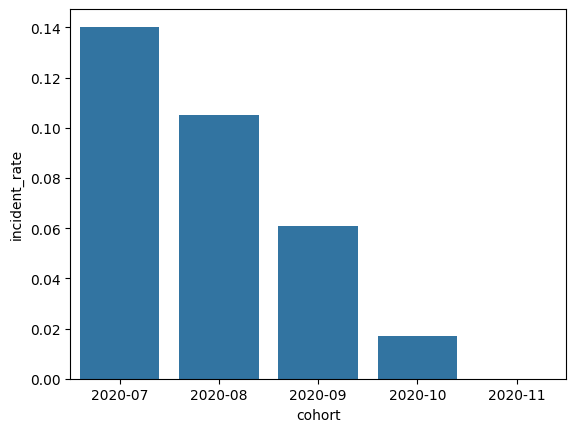

In [26]:
sns.barplot(ex2_df["incident_rate"]);

## 3.2 Revenue Generated by the Cohort

In [27]:
#  Get the money lend for every request paid
#  Calculate for every request the sum of the payments done
#  Substract from total paid the amount lend
ex3_requests_df = cashrequest_paid_df.copy()
ex3_fees_df = fees_filtered_df.copy()

# Prepare the requests
ex3_requests_df = ex3_requests_df[["id", "amount", "cohort", "status"]]

# Get Payments paid (Payments payed are the ones having a "paid_date" set)
ex3_fees_df = ex3_fees_df[ex3_fees_df["payment_date"].isna()==False]

# Calculate all the money paid for every request (Payments payed are the ones having a "paid_date" set)
ex3_fees_df["total_paid"] = ex3_fees_df.groupby("cash_request_id")["total_amount"].transform("sum") 

# Merge data in one DataFrame
ex3_df = ex3_requests_df.merge(ex3_fees_df[["cash_request_id", "payment_date", "total_paid"]], how="inner", left_on="id", right_on="cash_request_id")

# Calculate Revenue
ex3_df["revenue"] = ex3_df["total_paid"]
ex3_df["period"] = ex3_df["payment_date"].apply(lambda x: str(x.tz_convert(None).to_period("M")))

ex3_df = ex3_df.pivot_table(values = "revenue", index = "cohort" ,columns = "period", aggfunc = "sum").fillna(0)
ex3_df

period,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
cohort,,,,,,,,
2020-07,20.0,800.0,3465.0,4375.0,2225.0,655.0,100.0,95.0
2020-08,0.0,1160.0,19800.0,39425.0,21375.0,4015.0,1290.0,515.0
2020-09,0.0,0.0,800.0,12925.0,15535.0,2850.0,470.0,165.0
2020-10,0.0,0.0,5.0,12405.0,45350.0,12200.0,1700.0,805.0
2020-11,0.0,0.0,0.0,0.0,175.0,140.0,20.0,5.0


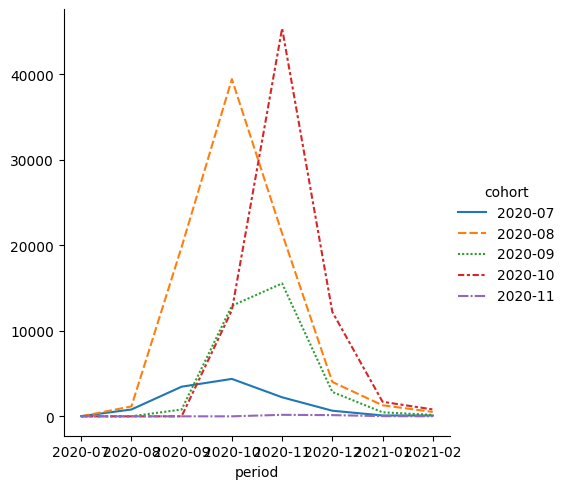

In [28]:
sns.relplot(data=ex3_df.T, kind="line");

In [225]:
# Checking the payment in 2020-09 from students in the cohort 2020-10
display(fees_filtered_df[(fees_filtered_df["payment_date"] < '2020-10') & (fees_filtered_df["cohort"]=="2020-10")])
display(cashrequest_paid_df[(cashrequest_paid_df["id"] == 17504)])

,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cohort,payment_date
12741,8968,17504.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 17504,2020-09-23 17:43:20.721529+00,2020-10-13 14:25:13.448883+00,2020-09-30 14:56:49.646210+00:00,NaN,NaN,after,17504,2020-10,2020-09-30 14:56:49.646210+00:00


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
9092,17504,100.0,money_back,2020-09-23 15:52:13.341432+00:00,2020-12-18 13:11:12.994428+00,38279.0,2020-09-23 17:43:19.14898+00,NaN,2020-10-17 15:52:13.300036+00,2020-09-24,2020-09-30 14:56:49.609771+00,instant,2020-10-07 15:52:13.300036+00:00,NaN,NaN,NaN,2020-10
